In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(
    "adult.data",
    names = [
        "age",
        "workclass",
        "fnlwgt",
        "education",
        "education_num",
        "marital_status",
        "occupation",
        "relationship",
        "race",
        "sex",
        "capital_gain",
        "capital_loss",
        "hours_per_week",
        "native_country",
        "amount"
    ],
    delimiter=",",
    index_col=False
)

data = {}

for r in df.iterrows():
    key = r[1]['race'] + r[1]['sex']
    if key not in data.keys():
        data[key] = [0, 0, 0]

    data[key][0] += 1
    switch_flag = 1 if r[1]['amount'] == ' >50K' else 2
    data[key][switch_flag] += 1

plot_df = pd.DataFrame(data).T
plot_df = plot_df.sort_index()

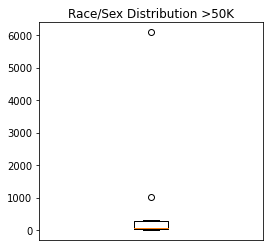

In [3]:
fig, ax = plt.subplots(figsize =(4, 4))

fig.patch.set_facecolor('white')

ax.set_title('Race/Sex Distribution >50K')

plt.boxplot(plot_df[1])
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.savefig('boxplot_greater.png', bbox_inches="tight")

plt.show()

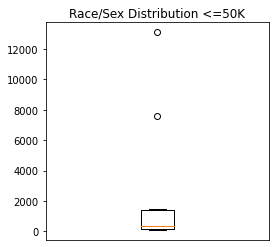

In [4]:
fig, ax = plt.subplots(figsize=(4, 4))

fig.patch.set_facecolor('white')

ax.set_title('Race/Sex Distribution <=50K')

plt.boxplot(abs(plot_df[2]))
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)

plt.savefig('boxplot_lesser.png', bbox_inches="tight")

plt.show()

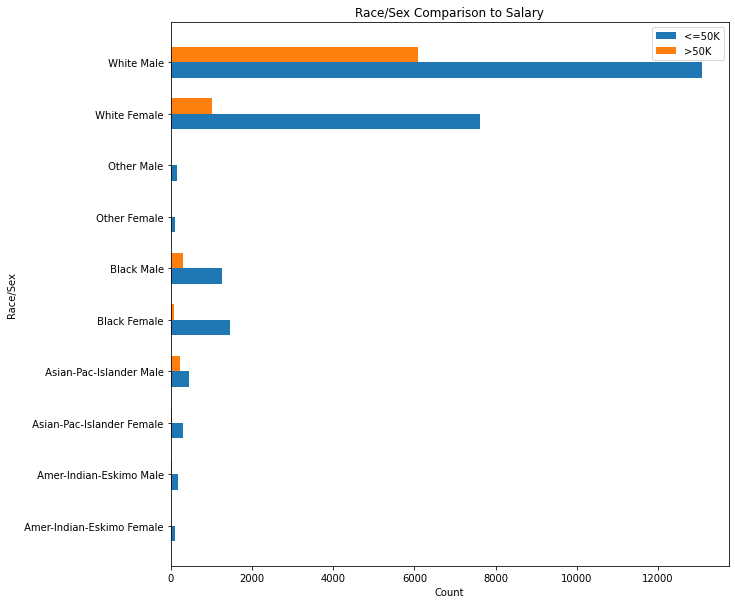

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

fig.patch.set_facecolor('white')

ax.set_title('Race/Sex Salary Comparison')

N = plot_df.shape[0]
ind = np.arange(N)
width = 0.3

plt.barh(ind, plot_df[2], width, label="<=50K")
plt.barh(ind+width, plot_df[1], width, label=">50K")

plt.xlabel("Count")
plt.ylabel("Race/Sex")
plt.title("Race/Sex Comparison to Salary")
plt.yticks(ind + width/2, plot_df.index)

plt.legend(loc='best')

plt.savefig('bar_plot.png', bbox_inches="tight")

plt.show()


In [ ]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = 'tab:orange'
color_blue = 'tab:blue'
index = plot_df.index
column0 = plot_df[2]
column1 = plot_df[1]
title0 = '<=50K'
title1 = '>50K'

fig, axes = plt.subplots(figsize=(20,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

fig.suptitle('Race/Sex Comparison to Salary', fontsize=16)

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)

# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis()

# To show data from highest to lowest
plt.gca().invert_yaxis()

axes[0].set(yticks=plot_df.index, yticklabels=plot_df.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color

axes[1].set_xticks([2000, 4000, 6000, 8000, 10000, 12000, 14000])

axes[1].set_xticklabels([2000, 4000, 6000, 8000, 10000, 12000, 14000])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
plt.savefig('race_sex_side_by_side.png', bbox_inches="tight")

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

cols = df.select_dtypes(['object']).columns
adult_data = pd.DataFrame()
adult_data[cols] = df[cols].apply(lambda x: x.str.strip())
adult_data['race'] = adult_data['race'] + ' ' + adult_data['sex']
adult_data = adult_data.sort_values('race')

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 12))

fig.patch.set_facecolor('white')

props = lambda key: {'color': 'tab:orange' if '<=50K' in key else 'tab:blue'}

mosaic(adult_data, [ 'race',  'amount'], labelizer=lambda k: "",
        label_rotation= 90, gap=0.005,  properties=props, ax=ax
      )

plt.axis((0,1,0,1))
ax.set_title('Race/Sex Vs Salary Level',fontweight="bold", size=20) # Title
ax.set_ylabel('Categories of Salary on $50k', fontsize = 20.0) # Y label
ax.set_xlabel('Race/Sex', fontsize = 20) # X label
# change the fontsize
ax.tick_params(axis = 'both', which = 'major', labelsize = 10, colors='black')
ax.tick_params(axis = 'both', which = 'minor', labelsize = 10, colors='black')
plt.savefig('race_sex_mosaic.png', bbox_inches="tight")

plt.show()